In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [183]:
file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [184]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
 work_year              int64
 experience_level      object
 employment_type       object
 job_title             object
 salary                 int64
 salary_currency       object
 salary_in_usd          int64
 employee_residence    object
 remote_ratio           int64
 company_location      object
 company_size          object
 dtype: object)

In [185]:
# Descriptive Statistics for numerical columns
numerical_stats = df.describe()

# Frequency distribution for categorical columns
categorical_stats = df.describe(include=['object'])

numerical_stats, categorical_stats

(          work_year        salary  salary_in_usd  remote_ratio
 count  14838.000000  1.483800e+04   14838.000000  14838.000000
 mean    2023.138900  1.650227e+05  149874.718763     32.760480
 std        0.700799  3.562354e+05   69009.181349     46.488278
 min     2020.000000  1.400000e+04   15000.000000      0.000000
 25%     2023.000000  1.021000e+05  102000.000000      0.000000
 50%     2023.000000  1.422000e+05  141300.000000      0.000000
 75%     2024.000000  1.875000e+05  185900.000000    100.000000
 max     2024.000000  3.040000e+07  800000.000000    100.000000,
        experience_level employment_type      job_title salary_currency  \
 count             14838           14838          14838           14838   
 unique                4               4            153              23   
 top                  SE              FT  Data Engineer             USD   
 freq               9696           14772           3162           13682   
 
        employee_residence company_location co

experience_level
SE    9696
MI    3553
EN    1148
EX     441
Name: count, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_22424\1872863673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data=df, palette='Set2')


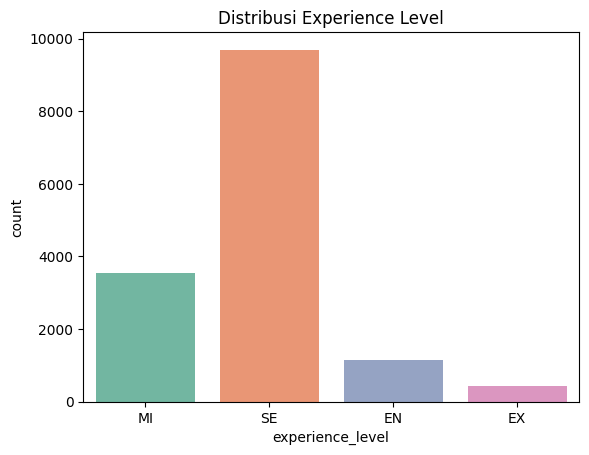

In [186]:
# Distribusi experience_level
print(df['experience_level'].value_counts())

# Visualisasi
sns.countplot(x='experience_level', data=df, palette='Set2')
plt.title('Distribusi Experience Level')
plt.show()

count     14838.000000
mean     149874.718763
std       69009.181349
min       15000.000000
25%      102000.000000
50%      141300.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


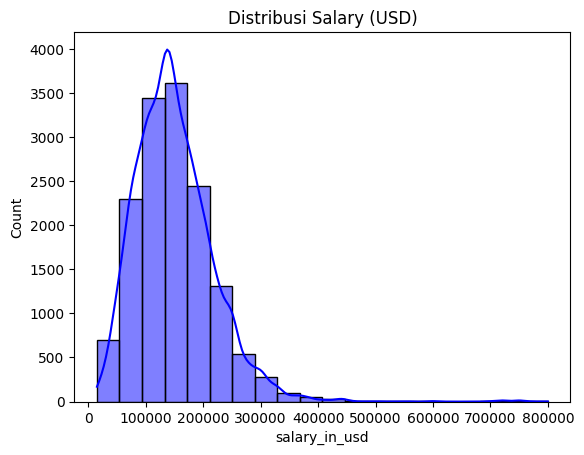

In [187]:
# Statistik deskriptif
print(df['salary_in_usd'].describe())

# Histogram
sns.histplot(df['salary_in_usd'], bins=20, kde=True, color='blue')
plt.title('Distribusi Salary (USD)')
plt.show()

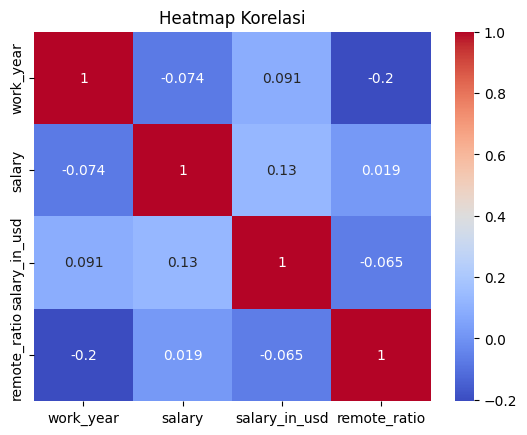

In [188]:
# Korelasi numerik
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22424\1535830748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remote_ratio', data=df, palette='muted')


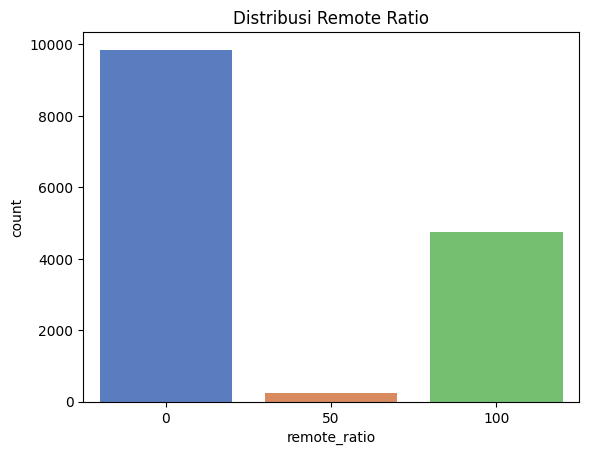

In [189]:
# Distribusi remote_ratio
sns.countplot(x='remote_ratio', data=df, palette='muted')
plt.title('Distribusi Remote Ratio')
plt.show()

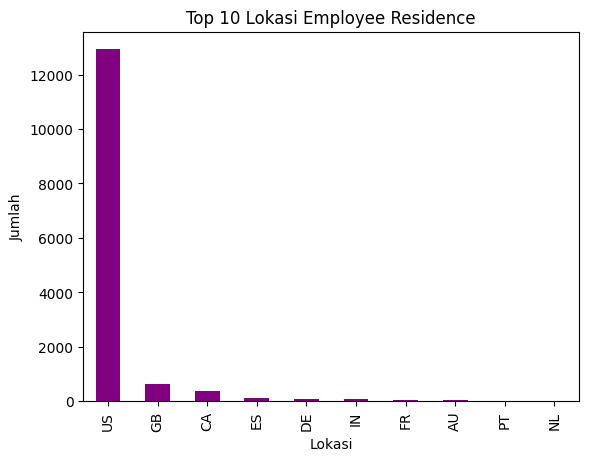

In [190]:
# Top 10 lokasi karyawan
top_locations = df['employee_residence'].value_counts().head(10)

# Visualisasi
top_locations.plot(kind='bar', color='purple')
plt.title('Top 10 Lokasi Employee Residence')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22424\2674798564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='company_size', data=df, palette='pastel')


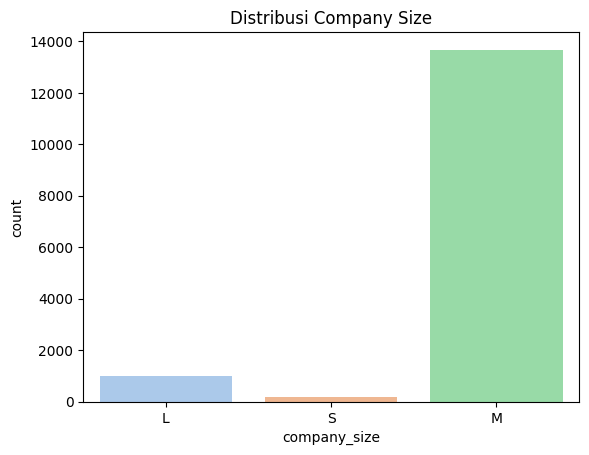

In [191]:
# Distribusi company_size
sns.countplot(x='company_size', data=df, palette='pastel')
plt.title('Distribusi Company Size')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_22424\273027534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')


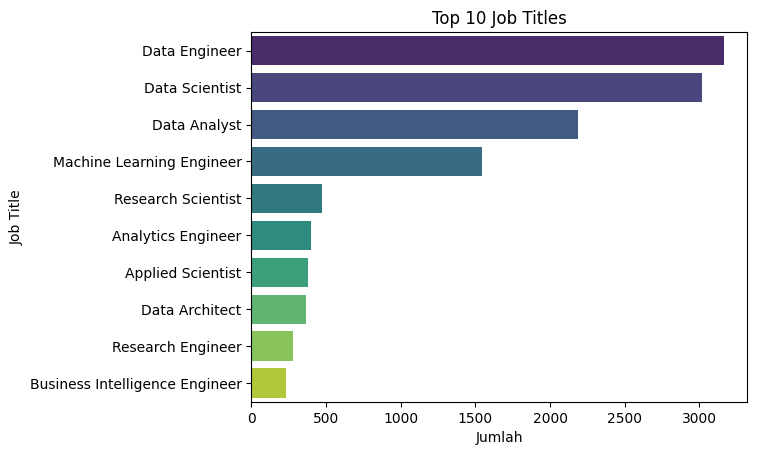

In [192]:
# Top 10 Job Titles
top_jobs = df['job_title'].value_counts().head(10)

# Visualisasi
sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Jumlah')
plt.ylabel('Job Title')
plt.show()

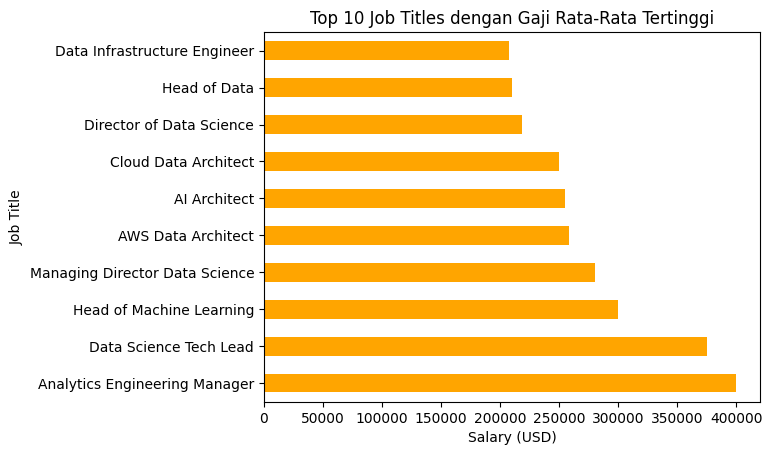

In [193]:
# Rata-rata gaji per job_title
avg_salary_per_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Visualisasi
avg_salary_per_job.plot(kind='barh', color='orange')
plt.title('Top 10 Job Titles dengan Gaji Rata-Rata Tertinggi')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

# **Model Training**

In [194]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [196]:
X = df.drop(['salary_in_usd'], axis=1)

y = df['salary_in_usd']

In [197]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [198]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['work_year',
 'salary',
 'remote_ratio',
 'experience_level_EX',
 'experience_level_MI',
 'experience_level_SE',
 'employment_type_FL',
 'employment_type_FT',
 'employment_type_PT',
 'job_title_AI Developer',
 'job_title_AI Engineer',
 'job_title_AI Product Manager',
 'job_title_AI Programmer',
 'job_title_AI Research Engineer',
 'job_title_AI Research Scientist',
 'job_title_AI Scientist',
 'job_title_AI Software Engineer',
 'job_title_AWS Data Architect',
 'job_title_Admin & Data Analyst',
 'job_title_Analytics Engineer',
 'job_title_Analytics Engineering Manager',
 'job_title_Applied Data Scientist',
 'job_title_Applied Machine Learning Engineer',
 'job_title_Applied Machine Learning Scientist',
 'job_title_Applied Research Scientist',
 'job_title_Applied Scientist',
 'job_title_Autonomous Vehicle Technician',
 'job_title_Azure Data Engineer',
 'job_title_BI Analyst',
 'job_title_BI Data Analyst',
 'job_title_BI Data Engineer',
 'job_title_BI Developer',
 'job_title_Big Data Archit

In [199]:
X_train[categorical].head()

""
36
9482
5716
10392
11845


In [200]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_cols = ["experience_level", "employment_type", "job_title", 
                    "salary_currency", "employee_residence", 
                    "company_location", "company_size"]

encoder = OneHotEncoder(sparse_output=False, drop="first")  # One-hot encode
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert encoded features into a DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Drop original categorical columns and concatenate the encoded features
X = X.drop(columns=categorical_cols)
X = pd.concat([X.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)


In [201]:
import pickle
with open("encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

In [202]:
X_train.head()

,work_year,salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,...,company_location_SG,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_M,company_size_S
36,-3.052193,5.431920,1.446425,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9482,-0.198209,-0.120775,-0.704728,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5716,1.228782,-0.014100,-0.704728,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10392,-1.625201,-0.152777,-0.704728,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11845,1.228782,-0.199938,-0.704728,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [203]:
numerical_cols = ["work_year", "salary", "remote_ratio"]  # Numerical columns

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [204]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((11870, 348), (2968, 348))

In [206]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.9967986568190756
Test Score: 0.9818186989424524


In [207]:
y_pred = model.predict(X_test)

y_pred

array([ 75056.88,  75000.  ,  65000.  , ..., 159000.  , 140000.  ,
       127513.  ])

In [208]:
import pickle
pickle.dump(model,open('rfg.pkl','wb'))

In [209]:
print("Model trained?", hasattr(model, "classes_"))

Model trained? False
